Dataset loaded successfully.

Global Summary:
Total Confirmed Cases: 16480485
Total Deaths: 654036
Total Recovered: 9468087
Total Active Cases: 6358362


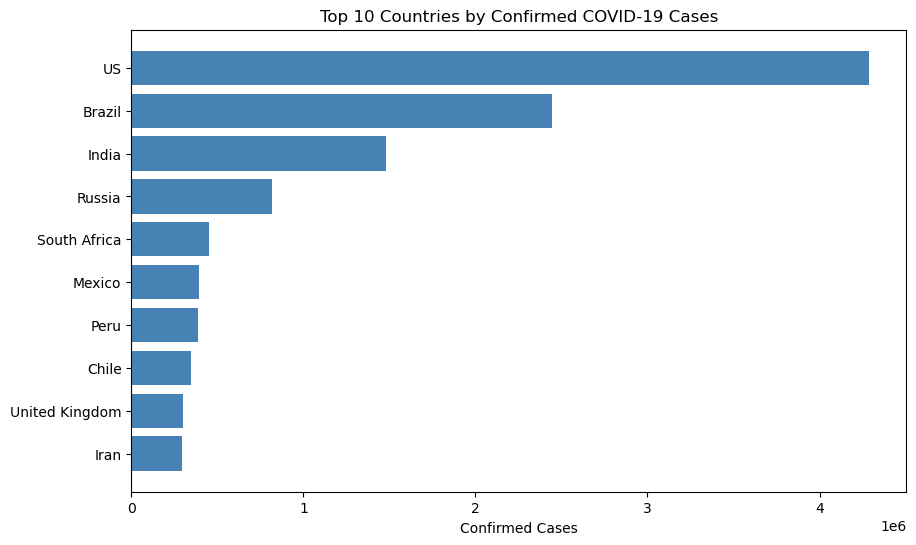


WHO Region Summary:
                       Total_Confirmed  Total_Deaths  Total_Recovered  \
WHO Region                                                              
Americas                       8839286        342732          4468616   
Europe                         3299523        211144          1993723   
South-East Asia                1835297         41349          1156933   
Eastern Mediterranean          1490744         38339          1201400   
Africa                          723207         12223           440645   
Western Pacific                 292428          8249           206770   

                       Total_Active  
WHO Region                           
Americas                    4027938  
Europe                      1094656  
South-East Asia              637015  
Eastern Mediterranean        251005  
Africa                       270339  
Western Pacific               77409  


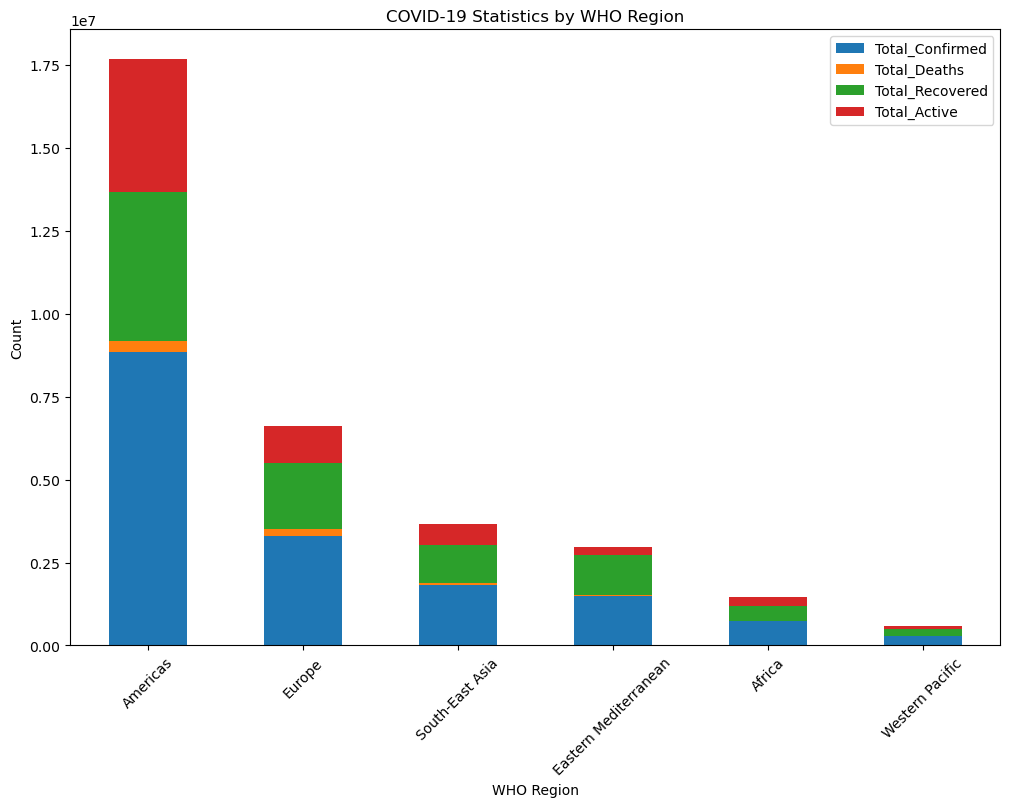

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure necessary folders exist
os.makedirs('data', exist_ok=True)
os.makedirs('visuals', exist_ok=True)

try:
    # Load the dataset
    dataset_path = 'data/covid19_dataset.csv'
    covid_data = pd.read_csv(dataset_path)
    print("Dataset loaded successfully.")

    # Check for missing values
    if covid_data.isnull().sum().any():
        print("Warning: Dataset contains missing values. Please clean the data.")
        print(covid_data.isnull().sum())

    # Global summary
    global_summary = {
        "Total Confirmed Cases": covid_data["Confirmed"].sum(),
        "Total Deaths": covid_data["Deaths"].sum(),
        "Total Recovered": covid_data["Recovered"].sum(),
        "Total Active Cases": covid_data["Active"].sum(),
    }
    print("\nGlobal Summary:")
    for key, value in global_summary.items():
        print(f"{key}: {value}")

    # Top 10 countries by confirmed cases
    top_confirmed = covid_data.nlargest(10, 'Confirmed')[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]

    # Visualization: Top 10 countries by confirmed cases
    plt.figure(figsize=(10, 6))
    plt.barh(top_confirmed['Country/Region'], top_confirmed['Confirmed'], color='steelblue')
    plt.xlabel('Confirmed Cases')
    plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
    plt.gca().invert_yaxis()
    plt.savefig('visuals/top_10_confirmed.png')
    plt.show()

    # WHO Region Summary
    region_summary = covid_data.groupby('WHO Region').agg(
        Total_Confirmed=('Confirmed', 'sum'),
        Total_Deaths=('Deaths', 'sum'),
        Total_Recovered=('Recovered', 'sum'),
        Total_Active=('Active', 'sum')
    ).sort_values(by='Total_Confirmed', ascending=False)

    print("\nWHO Region Summary:")
    print(region_summary)

    # Visualization: WHO Region Summary
    region_summary[['Total_Confirmed', 'Total_Deaths', 'Total_Recovered', 'Total_Active']].plot(
        kind='bar', stacked=True, figsize=(12, 8)
    )
    plt.ylabel('Count')
    plt.xlabel('WHO Region')
    plt.title('COVID-19 Statistics by WHO Region')
    plt.xticks(rotation=45)
    plt.savefig('visuals/region_summary.png')
    plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Ensure the dataset 'covid19_dataset.csv' exists in the 'data/' folder.")
except KeyError as e:
    print(f"Error: Missing column in dataset: {e}")
    print("Check the dataset for correct column names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


SyntaxError: invalid syntax (543086664.py, line 1)